# BIOS 512 Final Project

Violet Noe

For my final course project, I chose to analyze data on college majors from the American Community Survey 2010-2012 Public Use Microdata Series. First I imported the `recent-grads` dataset from https://github.com/fivethirtyeight/data/tree/master/college-majors. Then I created a dataset called `df_majors_share_women` to compute the mean share of women in each college major category. I then created a data set called `df_sorted` to sort the major categories by share of women in descending order. I then used `df_sorted` to create a bar chart of the percent of women in each major category. We can see from the bar chart that women make up nearly 80% of graduates from majors that fall into the categories of “Health” and “Psychology & Social Work”, whereas women only consist of 25-30% of graduates from “Engineering” and “Computers & Mathematics” majors.

Next I created a dataset called `df_majors_lumped`. I used this dataset to create side-by-side boxplots of the median income for major categories with 10 or more majors in that category. All other major categories were lumped into the "other" category. In this visualization we can see that the median income for engineering graduates (approximately 57k) is well above the median income for graduates from other majors (approximately 30-45k).  Finally, I created a scatterplot of percent of women against median income for each major in the dataset. I added a horizontal line at `50%` and a vertical line at `$51,000` to more clearly visualize where the majors in which women make up `50%` or more of graduates fall on the graph. From the scatterplot, we can see that almost all of the majors in which women make up `50%` or more of graduates have a median income that is less than `$51,000`. Women make up less than `50%` of graduates from all but one of the majors that have a median income higher than `$51,000`.

In [4]:
library('tidyverse')

In [5]:
df_majors = read_csv('https://raw.githubusercontent.com/fivethirtyeight/data/master/college-majors/recent-grads.csv')


── Column specification ────────────────────────────────────────────────────────
cols(
  .default = col_double(),
  Major = col_character(),
  Major_category = col_character()
)
ℹ Use `spec()` for the full column specifications.




In [6]:
df_majors %>% head

Rank,Major_code,Major,Total,Men,Women,Major_category,ShareWomen,Sample_size,Employed,⋯,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,2419,PETROLEUM ENGINEERING,2339,2057,282,Engineering,0.1205643,36,1976,⋯,270,1207,37,0.01838053,110000,95000,125000,1534,364,193
2,2416,MINING AND MINERAL ENGINEERING,756,679,77,Engineering,0.1018519,7,640,⋯,170,388,85,0.11724138,75000,55000,90000,350,257,50
3,2415,METALLURGICAL ENGINEERING,856,725,131,Engineering,0.1530374,3,648,⋯,133,340,16,0.02409639,73000,50000,105000,456,176,0
4,2417,NAVAL ARCHITECTURE AND MARINE ENGINEERING,1258,1123,135,Engineering,0.1073132,16,758,⋯,150,692,40,0.05012531,70000,43000,80000,529,102,0
5,2405,CHEMICAL ENGINEERING,32260,21239,11021,Engineering,0.3416305,289,25694,⋯,5180,16697,1672,0.06109771,65000,50000,75000,18314,4440,972
6,2418,NUCLEAR ENGINEERING,2573,2200,373,Engineering,0.1449670,17,1857,⋯,264,1449,400,0.17722641,65000,50000,102000,1142,657,244


In [12]:
df_majors_share_women = df_majors %>%
    group_by(Major_category) %>%
    summarize(mean.ShareWomen = mean(ShareWomen))

df_majors_share_women

Major_category,mean.ShareWomen
<chr>,<dbl>
Agriculture & Natural Resources,NA
Arts,0.6036579
Biology & Life Science,0.5871929
Business,0.4831979
Communications & Journalism,0.6583840
Computers & Mathematics,0.3117722
Education,0.7485075
Engineering,0.2388887
Health,0.7951519


Warning message:
“Removed 1 rows containing missing values (position_stack).”


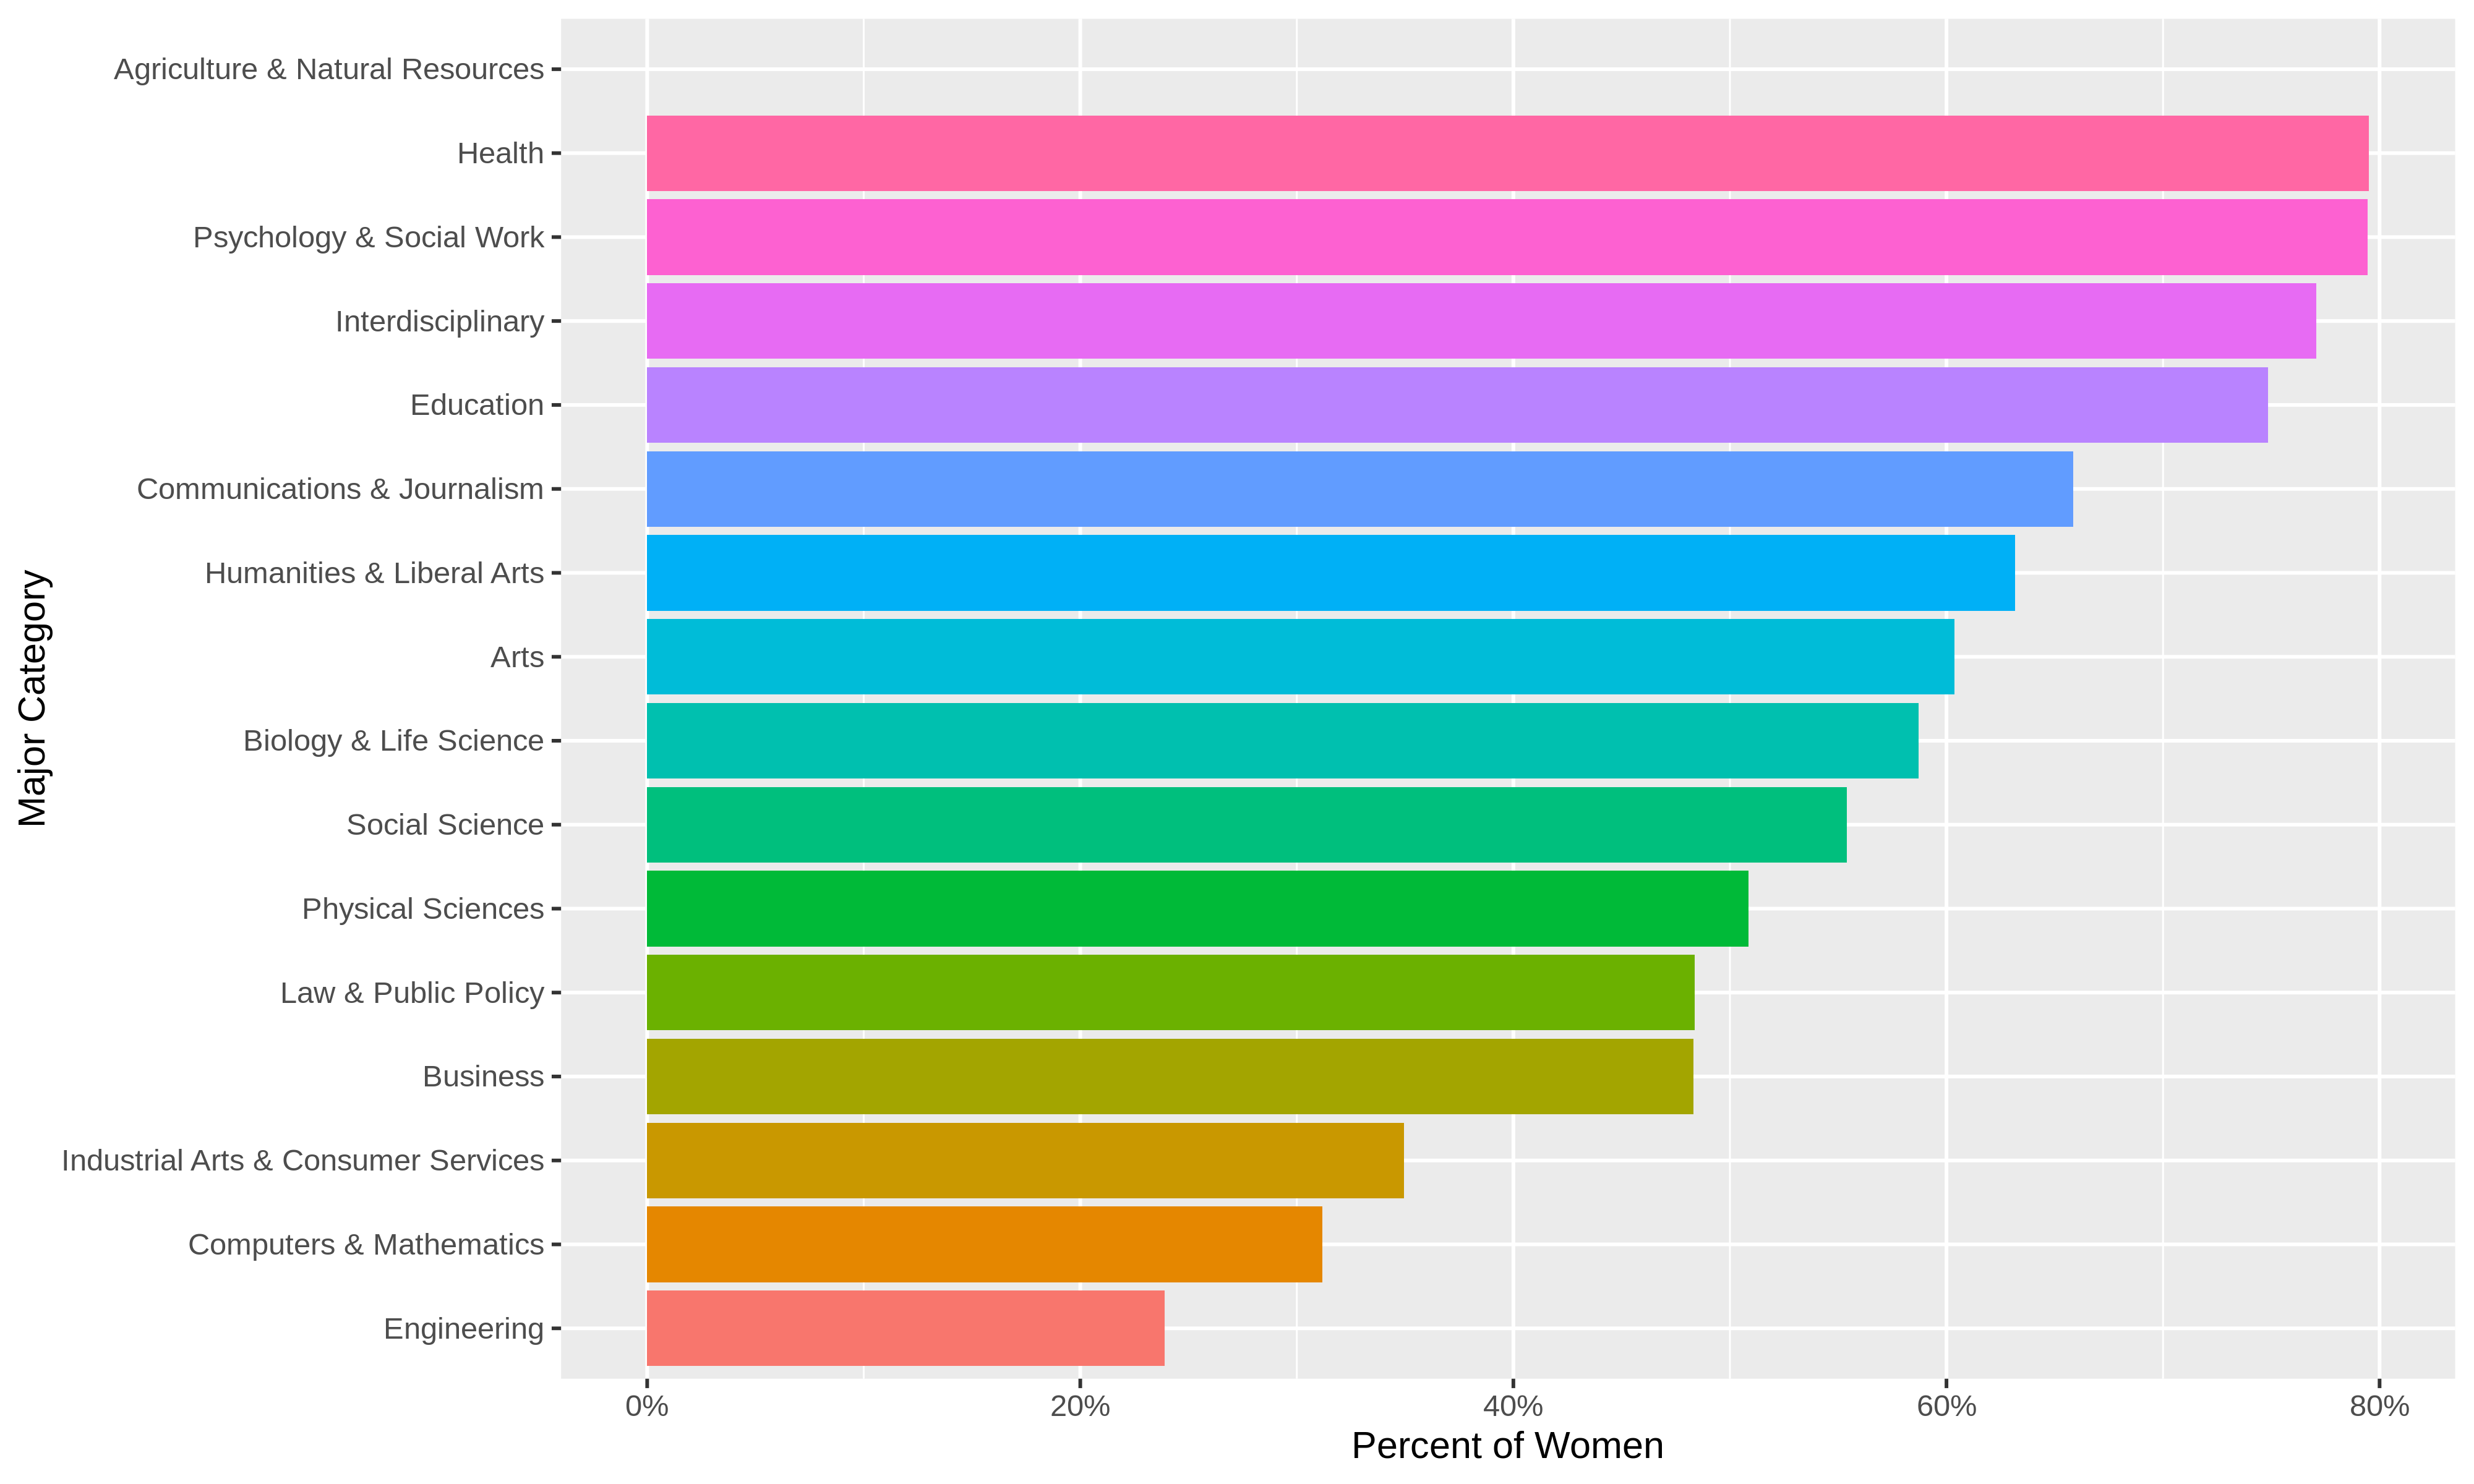

In [13]:
df_sorted = df_majors_share_women %>% mutate(Major_category = fct_reorder(Major_category, mean.ShareWomen))

options(repr.plot.res = 400, repr.plot.width=10, repr.plot.height = 6)

p = ggplot(df_sorted, aes(x = mean.ShareWomen, y = Major_category, fill = Major_category))

p = p + geom_col()

p = p + labs(x = "Percent of Women", y = "Major Category")

p = p + theme(legend.position = "none")

p = p + scale_x_continuous(labels = scales::percent_format(scale = 100)) 

p

In [9]:
df_majors %>%
    count(Major_category) %>%
    filter(n >= 10)

Major_category,n
<chr>,<int>
Agriculture & Natural Resources,10
Biology & Life Science,14
Business,13
Computers & Mathematics,11
Education,16
Engineering,29
Health,12
Humanities & Liberal Arts,15
Physical Sciences,10


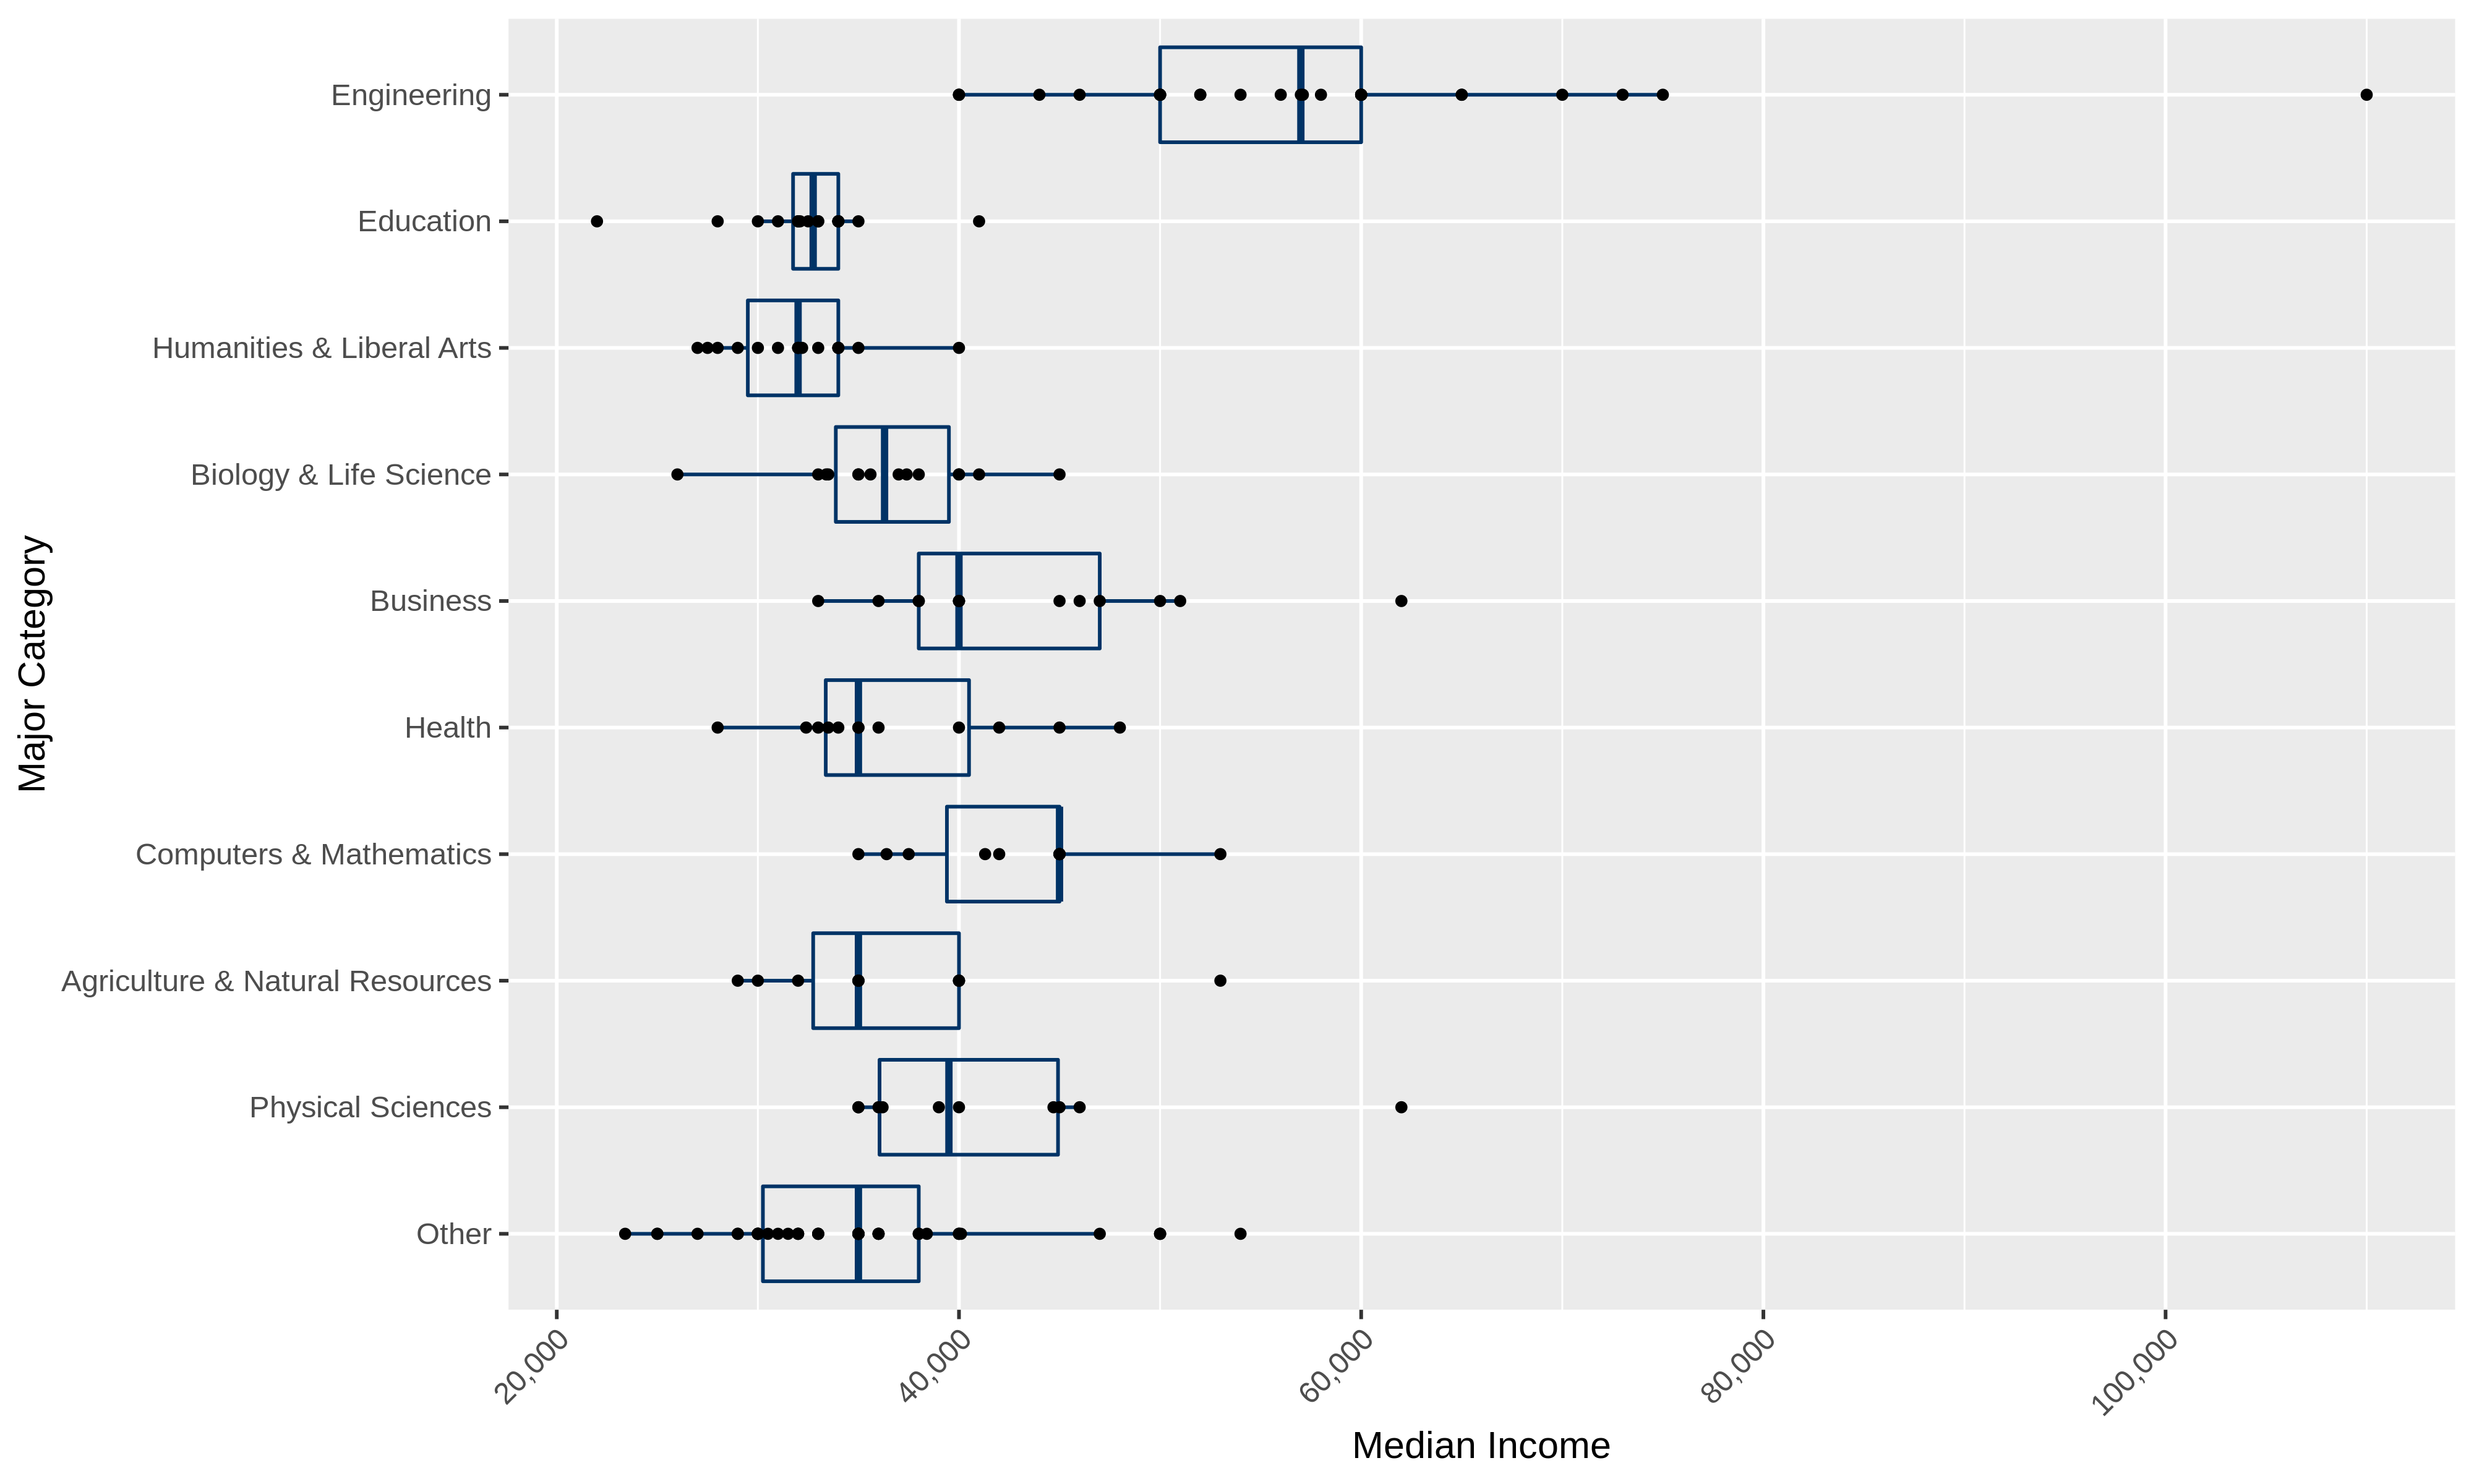

In [14]:
options(repr.plot.res = 400, repr.plot.width=10, repr.plot.height = 6)

df_majors_lumped = df_majors %>%
    mutate(Major_category_lumped = Major_category %>%
    fct_lump(n = 9) %>%
    fct_infreq() %>%
    fct_relevel('Other', after = Inf) %>%
    fct_rev())

p = ggplot(df_majors_lumped, aes(x = Median, y = Major_category_lumped))

p = p + geom_boxplot(fill = NA, outlier.shape = NA, color = '#003366')

p = p + geom_point(position = position_jitter(h = 0, w = 0.10), size = 1)

p = p + theme(axis.text.x = element_text(angle = 45, hjust = 1))

p = p + labs(x = "Median Income", y = "Major Category")

p = p + scale_x_continuous(labels = scales::comma_format(scale = 1)) 

p

Warning message:
“Removed 1 rows containing missing values (geom_point).”


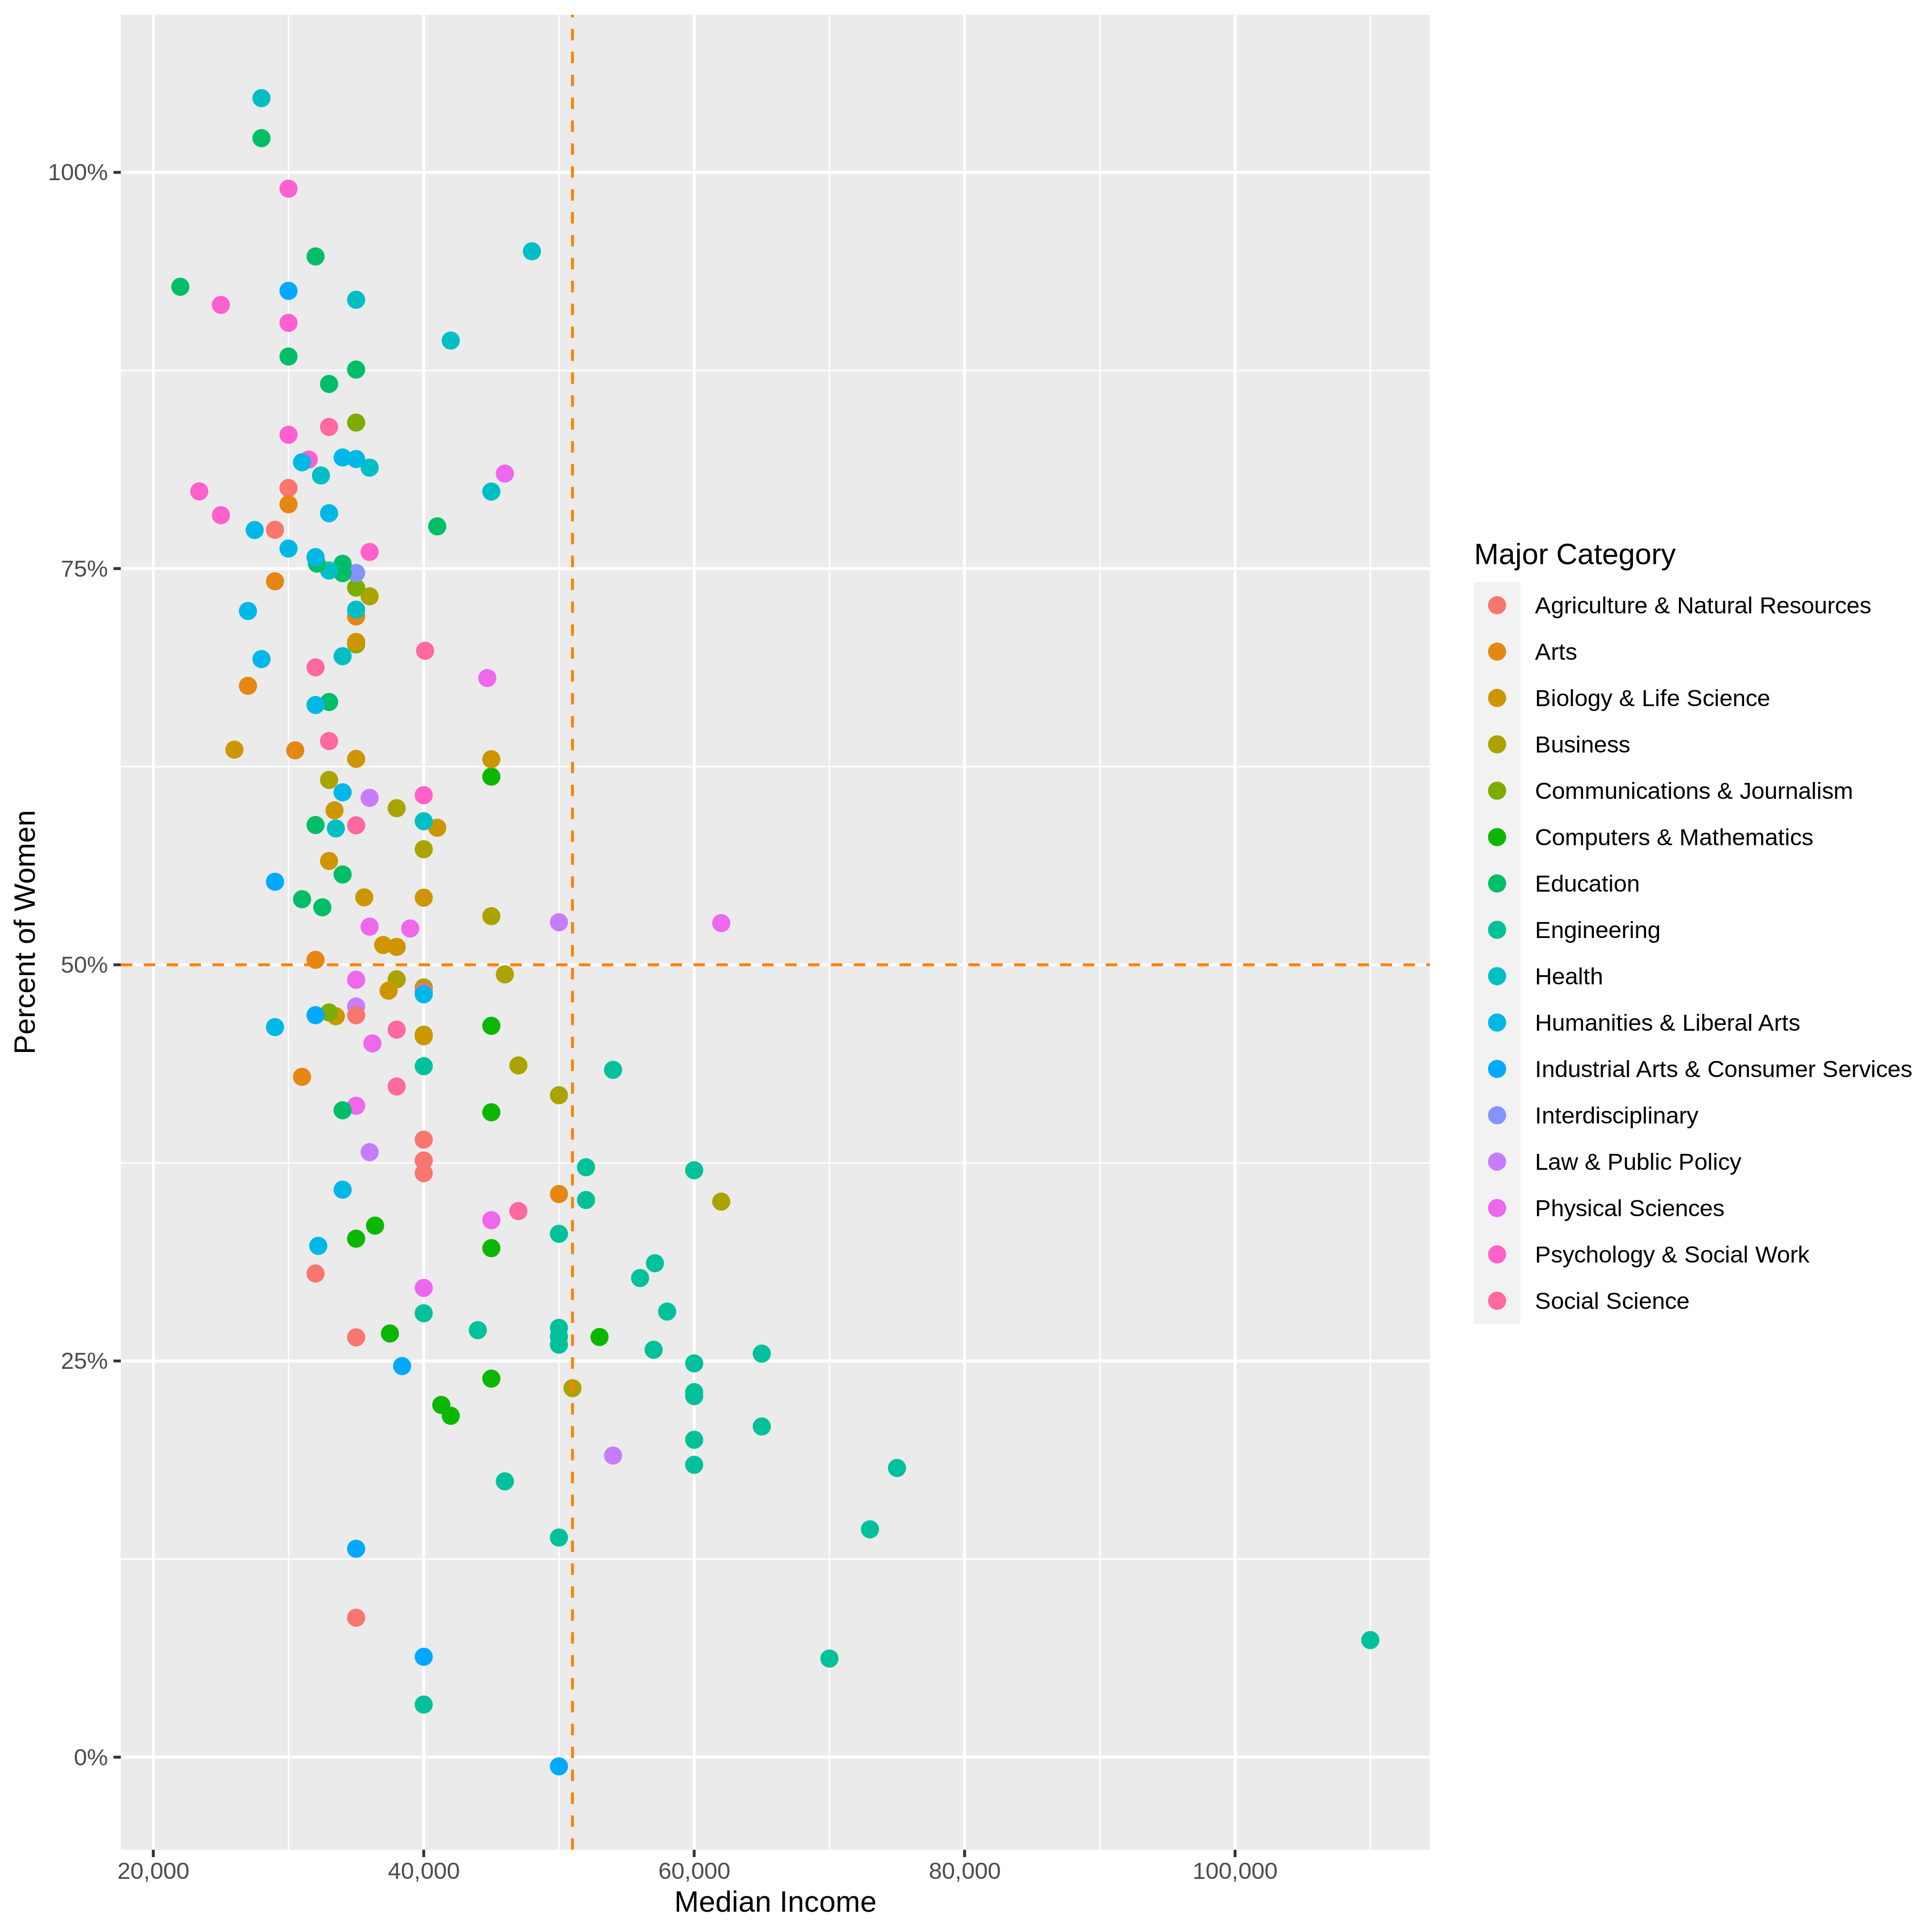

In [16]:
options(repr.plot.res = 400, repr.plot.width=10, repr.plot.height = 10)

p = ggplot(df_majors, aes(x = Median, y = ShareWomen, color= Major_category))

p = p + geom_point(position = position_jitter(h = .1, w = 0.5), size = 2.5)

p = p + scale_x_continuous(labels = scales::comma_format(scale = 1)) 

p = p + scale_y_continuous(labels = scales::percent_format(scale = 100))

p = p + geom_hline(yintercept = 0.5, color = "darkorange1", linetype = "dashed")

p = p + geom_vline(xintercept = 51000, color = "darkorange1", linetype = "dashed")

p = p + labs(x = 'Median Income', y = "Percent of Women")

p = p + scale_color_discrete(name="Major Category")

p